### Random Sample Imputation

Aim: Random sample imputation consists of taking random observation from the dataset and we use this observation to repalce the nan values 

when should it be used??
It assumes that the data are missing completely at random(MCAR)


In [1]:
import pandas as pd
df = pd.read_csv('Titanic_dataset.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [2]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [3]:
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [4]:
df['Age'].isnull().sum()

177

In [5]:
df['Age'].dropna().sample(df['Age'].isnull().sum(),random_state=0)

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

In [6]:
median = df.Age.median()
median

28.0

In [7]:
df[df['Age'].isnull()].index

Int64Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
            ...
            832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
           dtype='int64', length=177)

In [8]:
def impute_nan(df,variable,median):
    df[variable+"_median"]=df[variable].fillna(median)
    df[variable+"_random"]=df[variable]
    # it will have the random sample to fill the nan
    random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    ##pandas need to have same index in order to merge the dataset 
    
    random_sample.index=df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable+"_random"]=random_sample

In [9]:
impute_nan(df,'Age',median)

In [10]:
df.head(20)

,Survived,Age,Fare,Age_median,Age_random
0,0,22.0,7.2500,22.0,22.00
1,1,38.0,71.2833,38.0,38.00
2,1,26.0,7.9250,26.0,26.00
3,1,35.0,53.1000,35.0,35.00
4,0,35.0,8.0500,35.0,35.00
5,0,NaN,8.4583,28.0,28.00
6,0,54.0,51.8625,54.0,54.00
7,0,2.0,21.0750,2.0,2.00
8,1,27.0,11.1333,27.0,27.00
9,1,14.0,30.0708,14.0,14.00


In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

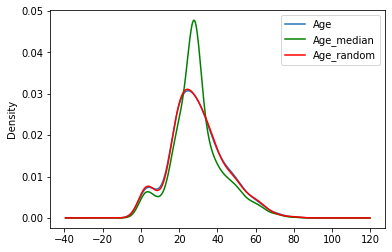

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax)
df.Age_median.plot(kind='kde', ax=ax, color='green')
df.Age_random.plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')
plt.show()

In [14]:
#### Advantages
#1. Easy To implement
#2. There is less distortion in variance

#### Disadvantages
#1.every situation randomness wont work

In [16]:
## Capturing NAN values with a new feature

#it works well if the data are not missing completely at random

In [17]:
import pandas as pd
df = pd.read_csv('Titanic_dataset.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [19]:
import numpy as np
df['Age_NAN']=np.where(df['Age'].isnull(),1,0)

In [21]:
df.head(20)

,Survived,Age,Fare,Age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
5,0,NaN,8.4583,1
6,0,54.0,51.8625,0
7,0,2.0,21.0750,0
8,1,27.0,11.1333,0
9,1,14.0,30.0708,0


In [24]:
df.Age.median()

28.0

In [26]:
df['Age'].fillna(df.Age.median(),inplace = True)
df.head(20)

,Survived,Age,Fare,Age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
5,0,28.0,8.4583,1
6,0,54.0,51.8625,0
7,0,2.0,21.0750,0
8,1,27.0,11.1333,0
9,1,14.0,30.0708,0


In [27]:
## Advanteges
#1. Easy to implement
#2. Capture the importance of missing values 

## Disadvanges
#1. Creating additional features(curse of dimensionlity)

In [28]:
#### End of Distribution imputation

In [29]:
import pandas as pd
df = pd.read_csv('Titanic_dataset.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


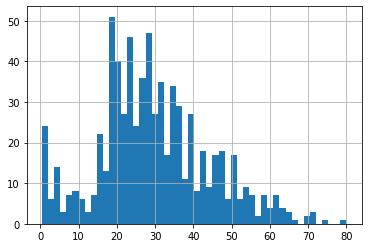

In [30]:
df.Age.hist(bins=50)

In [37]:
extreme=df.Age.mean()+3*df.Age.std()

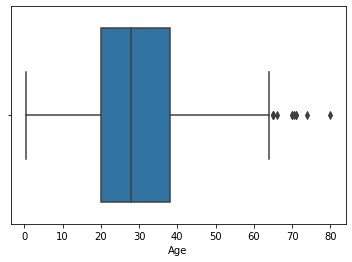

In [38]:
import seaborn as sns
sns.boxplot('Age',data=df)

In [39]:
def impute_nan(df,variable,median,extreme):
    df[variable+"_end_distribution"]=df[variable].fillna(extreme)
    df[variable].fillna(median,inplace=True)

In [40]:
impute_nan(df,'Age',df.Age.median(),extreme)

In [41]:
df.head(20)

,Survived,Age,Fare,Age_end_distribution
0,0,22.0,7.2500,22.00000
1,1,38.0,71.2833,38.00000
2,1,26.0,7.9250,26.00000
3,1,35.0,53.1000,35.00000
4,0,35.0,8.0500,35.00000
5,0,28.0,8.4583,73.27861
6,0,54.0,51.8625,54.00000
7,0,2.0,21.0750,2.00000
8,1,27.0,11.1333,27.00000
9,1,14.0,30.0708,14.00000


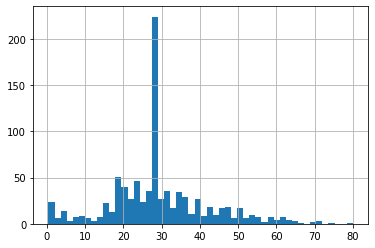

In [42]:
df['Age'].hist(bins = 50)

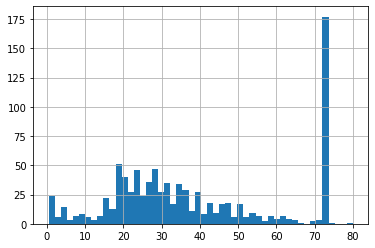

In [43]:
df['Age_end_distribution'].hist(bins=50)

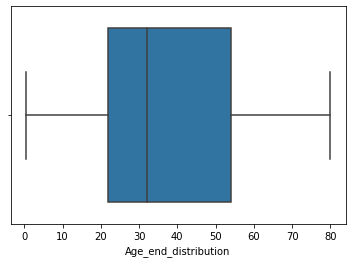

In [44]:
sns.boxplot('Age_end_distribution',data=df)

In [45]:
## Advantages
# 1. Easy to implement
# 2. Captures the important of missingness if there is one

## Disadvantages
# 1. Distorts the original distribution of the varibale
#2.if missingess is not important , it may mask the predictive power of the original variable by distorting its distribution 
#3.if the number of NA is big , it will mask the true outliers in the distribution 
#4. if the number of NA is small , the replaced NA may be considered an outlier and pre-processed in a subsequent featuring enginnering